In [ ]:
from pathlib import Path
config = """[default]
url=https://api.qiqb-cloud.jp
api_token=XXXXXXXXXXX
"""
Path("~/.oqtopus").expanduser().write_text(config)
print("Configuration saved.")

## Submit job

In [ ]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from src.adapter import QuriAdapter, collect_payloads_from_job

DEVICE = "anemone"
PROGRAM = "check_waveform"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e7425-d832-79c6-8000-6c8384eacc04
job_status = succeeded  elapsed=15.607
sample: [{'mode': 'avg', 'data': {'Q08': {'raw': {'I': [0.00031171872979030013, 0.0005212949472479522, -0.0005806078552268445, -0.00011875238124048337, 0.00028181300149299204, -0.000668566906824708, 0.0005839767982251942, 0.0006463798345066607, -0.0002644335327204317, -0.0001019293995341286, 0.0013551011215895414, 0.0016069976845756173, 0.001463980646803975, 0.002171190222725272, 0.0005528668407350779, -0.0007758191204629838, -0.0003031319356523454, 0.0013504240196198225, 0.005006164778023958, 0.004560291767120361, -0.005697326734662056, -0.022194014862179756, -0.03388933837413788, -0.040299512445926666, -0.04403598979115486, -0.04505510255694389, -0.04452265799045563, -0.046055734157562256, -0.046889130026102066, -0.04577821493148804, -0.0438118539750576, -0.042474426329135895, -0.040616318583488464, -0.03910200297832489, -0.03737262263894081, -0.03342210501432419, -0.030729327350854874, -0.0306269451

## Plot IQ data

Qubits: Q08


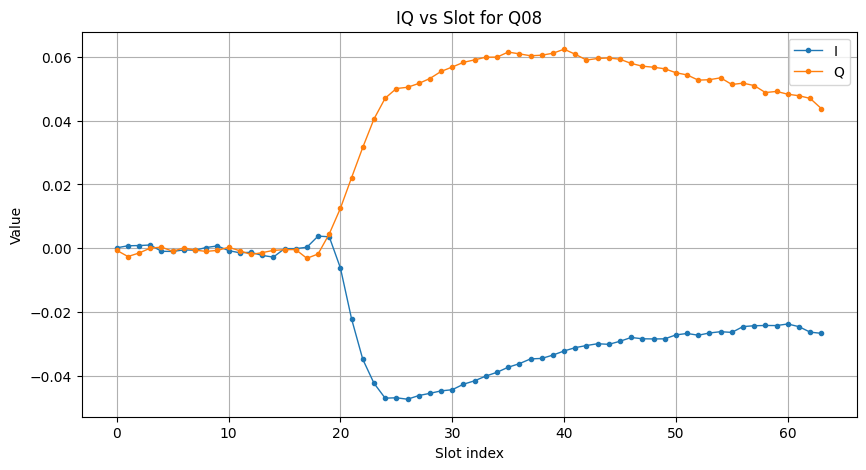

In [20]:
import matplotlib.pyplot as plt
p = payloads[0]
label=list(p["data"].keys())[0]
print("Qubits:", label)
raw = p["data"][label]["raw"]
i = raw["I"]
q = raw["Q"]

slots = list(range(len(i)))

plt.figure(figsize=(10, 5))
plt.plot(slots, i, label="I", marker="o", markersize=3, linewidth=1)
plt.plot(slots, q, label="Q", marker="o", markersize=3, linewidth=1)
plt.xlabel("Slot index")
plt.ylabel("Value")
plt.title(f"IQ vs Slot for {label}")
plt.legend()
plt.grid(True)
plt.show()